# IPCV / SW04 - Filter I

Loesungen von: Timo Furrer <tuxtimo@gmail.com>

In [1]:
import numpy as np
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline
# resolution of images in figure
mpl.rcParams['figure.dpi']= 200
# figure size in inches
mpl.rcParams["figure.figsize"] = [20, 5]

## Aufgabe 1

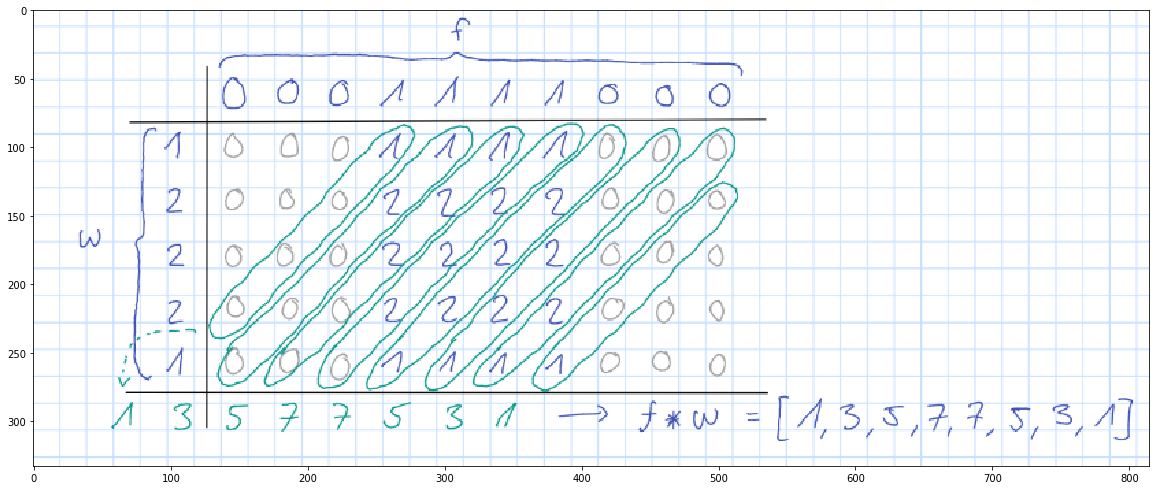

In [2]:
# von Hand
image = cv2.cvtColor(cv2.imread("aufgabe_1.png"), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.show()

In [3]:
# 1D Bild in Graustufenwerten
f = np.array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

# Maske 
w = np.array([1, 2, 2, 2, 1])

In [4]:
# Mit numpy
I = np.convolve(f, w)
print("Faltung conv(f, w):", I)

Faltung conv(f, w): [0 0 0 1 3 5 7 7 5 3 1 0 0 0]


## Aufgabe 2

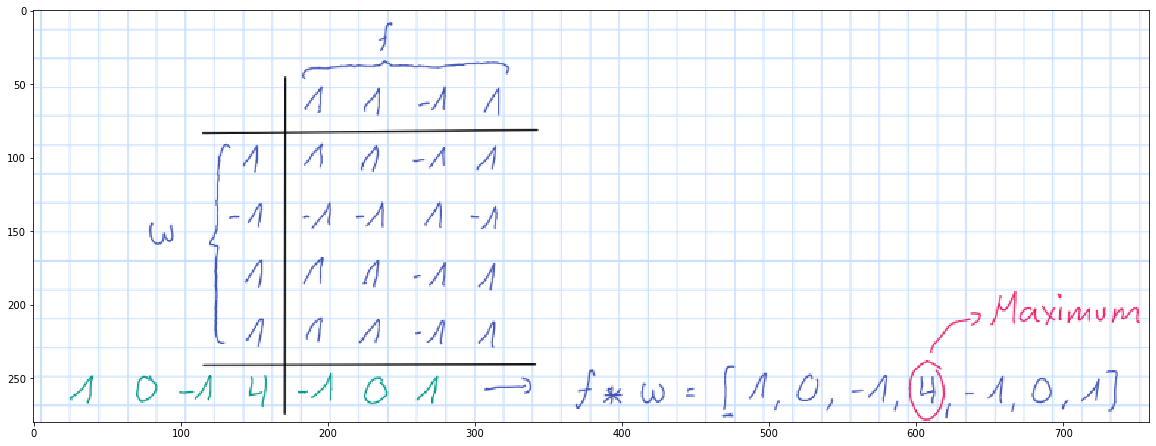

In [5]:
# von Hand
image = cv2.cvtColor(cv2.imread("aufgabe_2.png"), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.show()

In [6]:
# Barker-Code
f = np.array([1, 1, -1, 1])

# Maske
w = np.array([1, -1, 1, 1])

In [7]:
I = np.convolve(f, w)
print("Faltung mit Barker-Code:", I)

Faltung mit Barker-Code: [ 1  0 -1  4 -1  0  1]


In [8]:
m_i = np.argmax(I)
m = I[m_i]
print(f"Das Maximum liegt bei {m_i} mit {m}")

Das Maximum liegt bei 3 mit 4


## Aufgabe 3

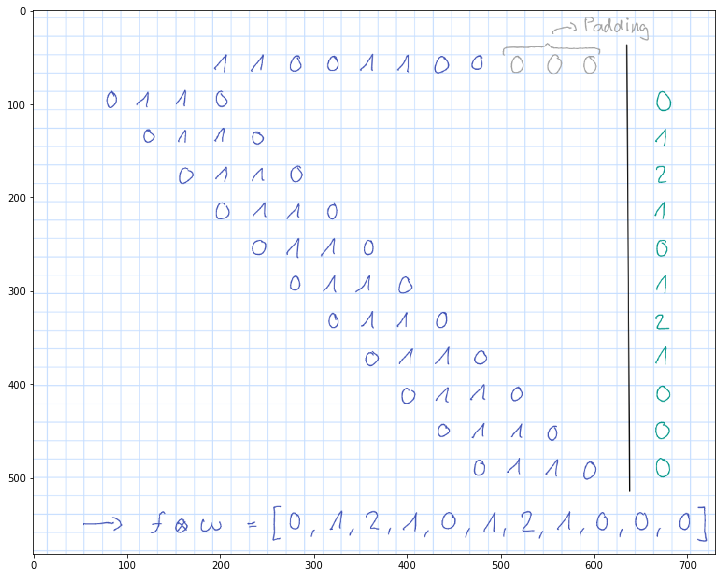

In [9]:
# von Hand
image = cv2.cvtColor(cv2.imread("aufgabe_3.png"), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.show()

In [10]:
f = np.array([1, 1, 0, 0, 1, 1, 0, 0])
g = np.array([0, 1, 1, 0])

In [11]:
corr = np.correlate(f, g, "full")
print("Korrelation zwischen f und g:", corr)

Korrelation zwischen f und g: [0 1 2 1 0 1 2 1 0 0 0]


## Aufgabe 4

In [12]:
image = cv2.imread("images/DIP+MatLab-Gonzalesetal-F04.09a.tif")

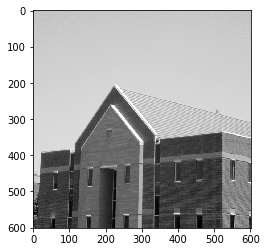

In [13]:
plt.imshow(image)
plt.show()

### Mit Prewitt- und Sobel-Operator

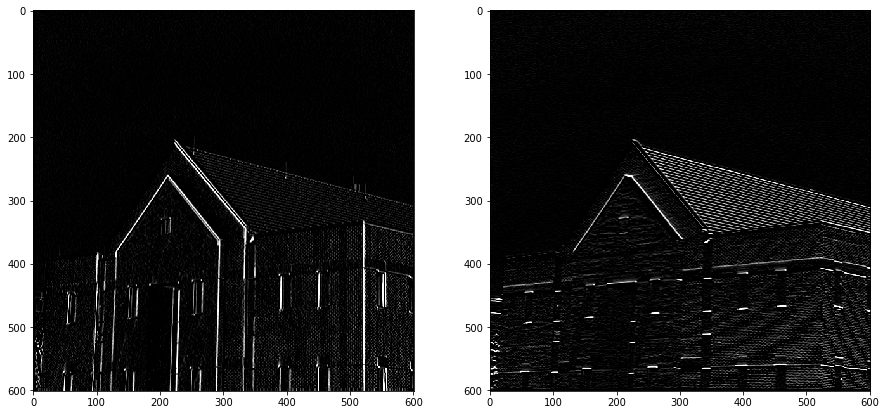

In [14]:
prewitt_operator = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_operator = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

prewitt_img = cv2.filter2D(image, -1, prewitt_operator)
sobel_img = cv2.filter2D(image, -1, sobel_operator)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(prewitt_img)
plt.subplot(1, 2, 2)
plt.imshow(sobel_img)
plt.show()

### Mit Laplace Kernels

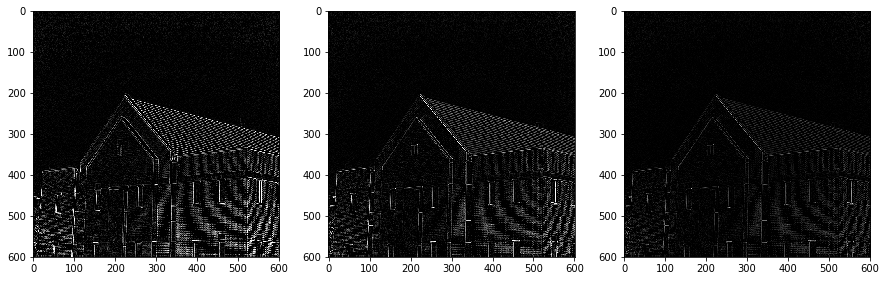

In [15]:
l1 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
l2 = np.array([[0, -1, -1], [-1, 6, -1], [-1, -1, 0]])
l3 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

l1_img = cv2.filter2D(image, -1, l1)
l2_img = cv2.filter2D(image, -1, l2)
l3_img = cv2.filter2D(image, -1, l3)

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(l1_img)
plt.subplot(1, 3, 2)
plt.imshow(l2_img)
plt.subplot(1, 3, 3)
plt.imshow(l3_img)
plt.show()

## Aufgabe 5

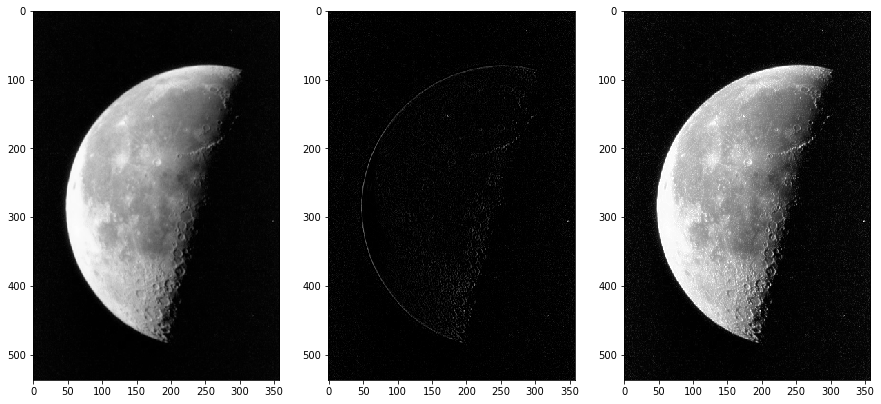

In [16]:
image = cv2.imread('images/moon.tif')

l3 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

laplace = cv2.filter2D(image, -1, l3)
laplace_combined = cv2.add(image, laplace)

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(laplace)
plt.subplot(1, 3, 3)
plt.imshow(laplace_combined)
plt.show()

## Aufgabe 6

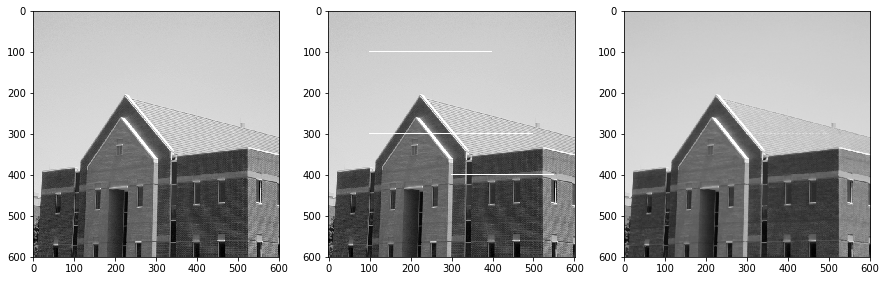

In [17]:
image = cv2.imread("images/DIP+MatLab-Gonzalesetal-F04.09a.tif")

image_scratches = image.copy()

image_scratches[100,100:400] = [255, 255, 255]  # 1 Pixel scratch
image_scratches[400,300:550] = [255, 255, 255]  # 1 Pixel scratch
image_scratches[300:301,100:500] = [255, 255, 255]  # 2 Pixel scratch

image_scratches_removed = cv2.medianBlur(image_scratches, 3)  # Nehme 3 weil Pixel von 1-2 Pixeln sind.

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(image_scratches)
plt.subplot(1, 3, 3)
plt.imshow(image_scratches_removed)
plt.show()